Task 1
Import the "cameraman.jpeg" image and apply

<img src = Images/cameraman.jpeg style="width:300px;height:300px">

a) Sobel edge detector (Apply horizontal and vertical sobel filters and display the Sobel magnitude image)

b) Prewitt edge detector (Apply horizontal and vertical prewitt filters and display the Prewitt magnitude image)

c) Laplacian edge detector 

d) Edge detection using difference of Gaussians (DoG)
    
Note: 
1. You can't use opencv or any other library function to detect edges
2. Apply zero-padding to make the filtered image size same as original image. Display the original image with the filtered images in a 1X2 plot. 

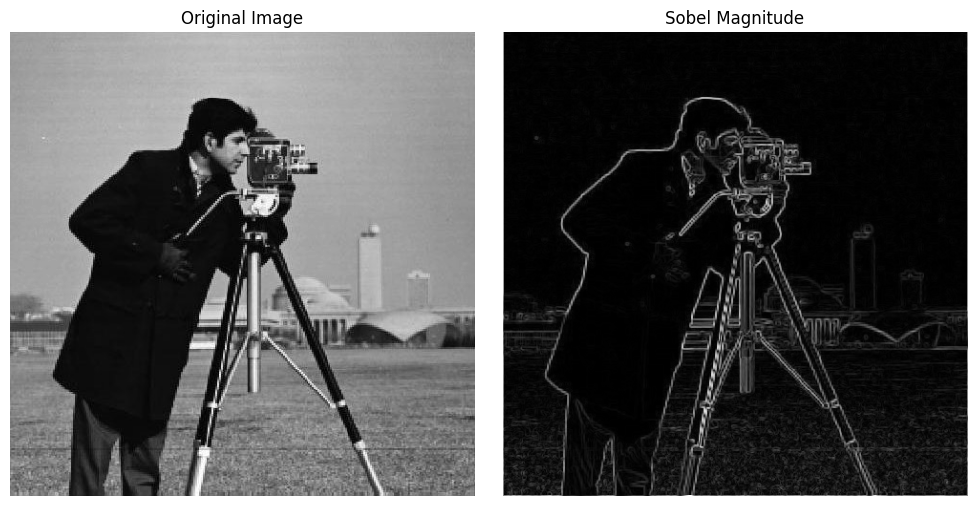

In [116]:
# a)
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the image
image_path = 'Images/cameraman.jpeg'
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_array = np.array(image)

# Define Sobel kernels for horizontal and vertical edges
sobel_kernel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sobel_kernel_y = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

def apply_convolution(image, kernel):
    pad_size = kernel.shape[0] // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    
    # Create a view of the padded image with sliding windows
    window_shape = (kernel.shape[0], kernel.shape[1], image.shape[0], image.shape[1])
    strides = padded_image.strides * 2
    image_windows = np.lib.stride_tricks.as_strided(padded_image, window_shape, strides)
    
    # Perform element-wise multiplication and sum along the sliding windows
    result = np.sum(image_windows * kernel[:, :, np.newaxis, np.newaxis], axis=(0, 1))
    
    return result

# Apply Sobel operators
sobel_x = apply_convolution(image_array, sobel_kernel_x)
sobel_y = apply_convolution(image_array, sobel_kernel_y)

# Compute magnitude of the gradient
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Display original image and Sobel magnitude image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()


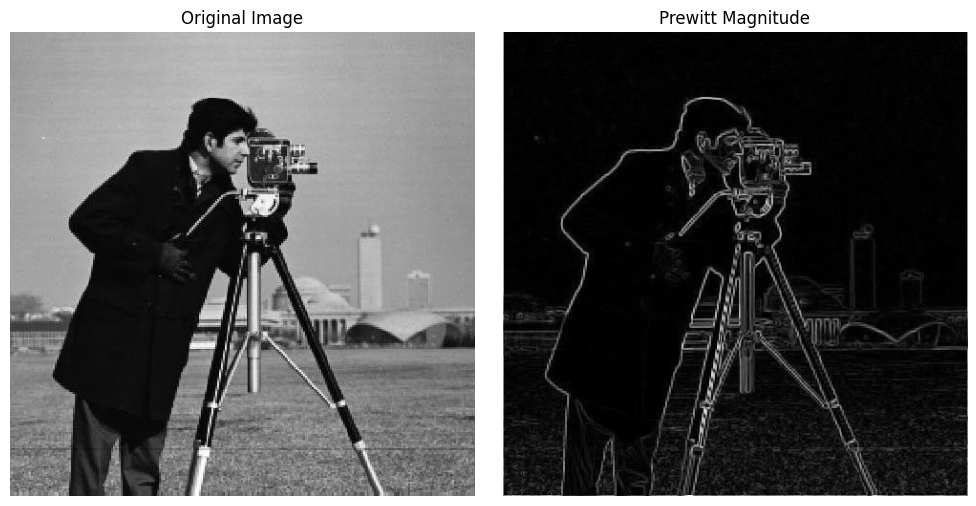

In [117]:
# b)
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the image
image_path = 'Images/cameraman.jpeg'
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_array = np.array(image)

# Define Prewitt kernels for horizontal and vertical edges
prewitt_kernel_x = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]])

prewitt_kernel_y = np.array([[-1, -1, -1],
                             [0, 0, 0],
                             [1, 1, 1]])

# Function to apply convolution with zero-padding
def apply_convolution(image, kernel):
    pad_size = kernel.shape[0] // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    
    # Create a view of the padded image with sliding windows
    window_shape = (kernel.shape[0], kernel.shape[1], image.shape[0], image.shape[1])
    strides = padded_image.strides * 2
    image_windows = np.lib.stride_tricks.as_strided(padded_image, window_shape, strides)
    
    # Perform element-wise multiplication and sum along the sliding windows
    result = np.sum(image_windows * kernel[:, :, np.newaxis, np.newaxis], axis=(0, 1))
    
    return result

# Apply Prewitt operators
prewitt_x = apply_convolution(image_array, prewitt_kernel_x)
prewitt_y = apply_convolution(image_array, prewitt_kernel_y)

# Compute magnitude of the gradient
prewitt_magnitude = np.sqrt(prewitt_x**2 + prewitt_y**2)

# Display original image and Prewitt magnitude image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(prewitt_magnitude, cmap='gray')
plt.title('Prewitt Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()


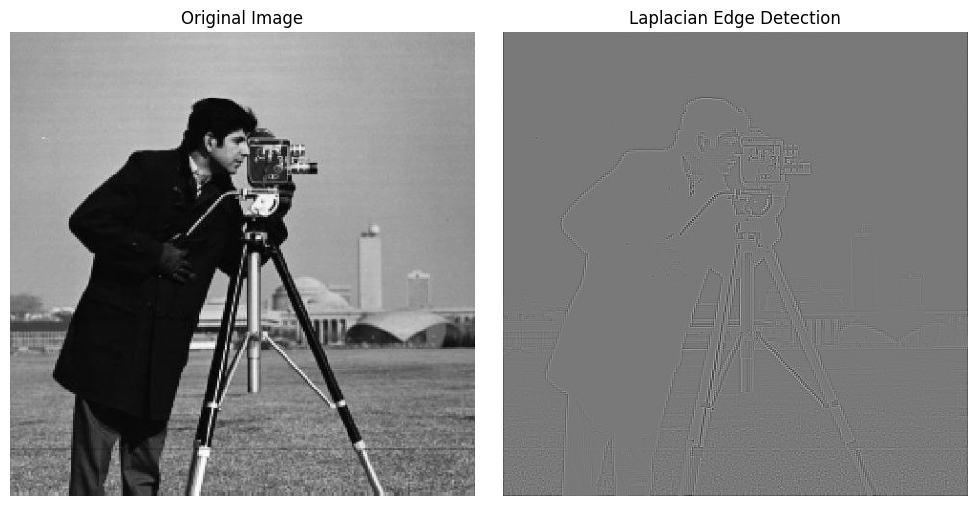

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the image
image_path = 'Images/cameraman.jpeg'
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_array = np.array(image)

# Define the Laplacian kernel
laplacian_kernel = np.array([[0, 1, 0],
                              [1, -4, 1],
                              [0, 1, 0]])

# Function to apply convolution with zero-padding
def apply_convolution(image, kernel):
    pad_size = kernel.shape[0] // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    
    # Create a view of the padded image with sliding windows
    window_shape = (kernel.shape[0], kernel.shape[1], image.shape[0], image.shape[1])
    strides = padded_image.strides * 2
    image_windows = np.lib.stride_tricks.as_strided(padded_image, window_shape, strides)
    
    # Perform element-wise multiplication and sum along the sliding windows
    result = np.sum(image_windows * kernel[:, :, np.newaxis, np.newaxis], axis=(0, 1))
    
    return result

# Apply Laplacian operator
laplacian = apply_convolution(image_array, laplacian_kernel)

# Display original image and Laplacian edge-detected image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


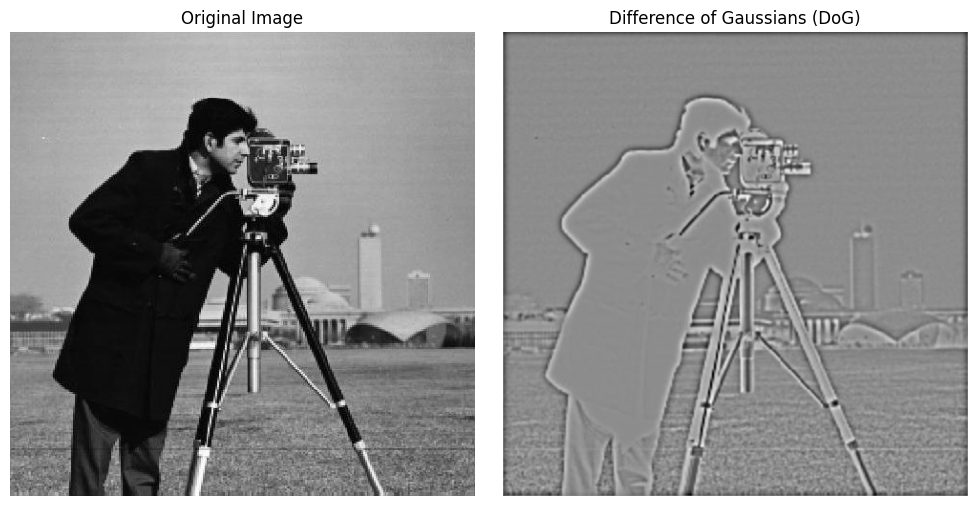

In [141]:
# d)
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the image
image_path = 'Images/cameraman.jpeg'
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_array = np.array(image)

# Define the standard deviations for the two Gaussian filters
sigma1 = 1
sigma2 = 3.5

# Function to apply convolution with zero-padding
def convolution(image, kernel):
    pad_size = kernel.shape[0] // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    
    # Create a view of the padded image with sliding windows
    window_shape = (kernel.shape[0], kernel.shape[1], image.shape[0], image.shape[1])
    strides = padded_image.strides * 2
    image_windows = np.lib.stride_tricks.as_strided(padded_image, window_shape, strides)
    
    # Perform element-wise multiplication and sum along the sliding windows
    result = np.sum(image_windows * kernel[:, :, np.newaxis, np.newaxis], axis=(0, 1))
    
    return result

# Function to generate Gaussian filter
def gaussian(sigma):
    size = int(6 * sigma + 1)
    if size % 2 == 0:
        size += 1  # Make sure size is odd
    
    x, y = np.meshgrid(np.linspace(-size/2, size/2, size), np.linspace(-size/2, size/2, size))
    gaussian = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    gaussian /= np.sum(gaussian)  # Normalize the kernel
    
    return gaussian

# Apply Gaussian filters
gaussian1 = convolution(image_array, gaussian(sigma1))
gaussian2 = convolution(image_array, gaussian(sigma2))

# Compute the Difference of Gaussians (DoG)
dog = gaussian2 - gaussian1

# Display original image and DoG edge-detected image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dog, cmap='gray')
plt.title('Difference of Gaussians (DoG)')
plt.axis('off')

plt.tight_layout()
plt.show()


Another implementation of DoG "Secondary code"

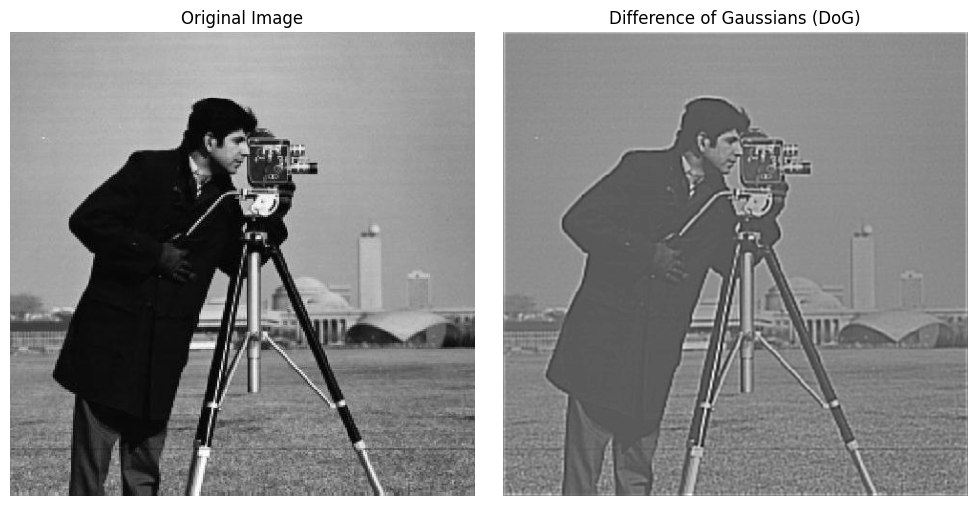

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the image
image_path = 'Images/cameraman.jpeg'
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_array = np.array(image)

# Define the standard deviations for the two Gaussian filters
sigma1 = 1
sigma2 = 2

# Create the Gaussian filters
size = 3
x, y = np.meshgrid(np.linspace(-size, size, 2*size+1), np.linspace(-size, size, 2*size+1))
gaussian1 = np.exp(-(x**2 + y**2) / (2 * sigma1**2)) / (2 * np.pi * sigma1**2)
gaussian2 = np.exp(-(x**2 + y**2) / (2 * sigma2**2)) / (2 * np.pi * sigma2**2)

# Apply zero-padding to the original image
padded_image = np.pad(image_array, size, mode='constant')

# Convolve the padded image with the Gaussian filters
filtered_image1 = convolve2d(padded_image, gaussian1, mode='valid')
filtered_image2 = convolve2d(padded_image, gaussian2, mode='valid')

# Compute the Difference of Gaussians (DoG)
dog_image = filtered_image1 - filtered_image2

# Display original image and DoG image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dog_image, cmap='gray')
plt.title('Difference of Gaussians (DoG)')
plt.axis('off')

plt.tight_layout()
plt.show()


### Task 2 

<img src = Images/cameraman.jpeg style="width:300px;height:300px">

The Canny edge detector is an edge detection algorithm with multiple steps. The steps in the Canny edge detector are listed below: 

    - Smooth the image to remove the noise (Gaussian filter)
    - Find the gradients of the image
    - Apply non-maximum suppression
    - Apply double threshold. Select edge pixels by hysteresis (suppress all edges that are weak and not connected to strong edges).

Implement "Canny Edge Detector" from scratch using the steps above (for each step above, you can use library functions) and compare your result on "cameraman.jpeg" image with OpenCV implementation of "Canny Edge Detector" (https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html)

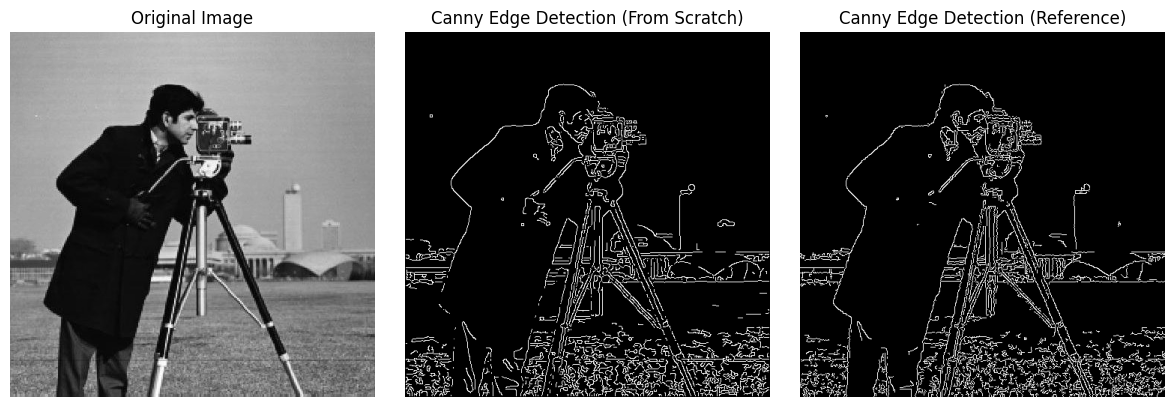

In [114]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_blur(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def sobel_operators(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    return sobel_x, sobel_y

def gradient_magnitude(sobel_x, sobel_y):
    return np.sqrt(sobel_x**2 + sobel_y**2)

def gradient_direction(sobel_x, sobel_y):
    return np.arctan2(sobel_y, sobel_x)

def non_max_suppression(magnitude, direction):
    rows, cols = magnitude.shape
    suppressed = np.zeros((rows, cols), dtype=np.uint8)
    
    # Convert direction to degrees
    angle = direction * (180. / np.pi)
    angle[angle < 0] += 180

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            mag = magnitude[i, j]
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                prev_mag = magnitude[i, j-1]
                next_mag = magnitude[i, j+1]
            elif (22.5 <= angle[i, j] < 67.5):
                prev_mag = magnitude[i-1, j-1]
                next_mag = magnitude[i+1, j+1]
            elif (67.5 <= angle[i, j] < 112.5):
                prev_mag = magnitude[i-1, j]
                next_mag = magnitude[i+1, j]
            else:
                prev_mag = magnitude[i-1, j+1]
                next_mag = magnitude[i+1, j-1]
            
            if mag >= prev_mag and mag >= next_mag:
                suppressed[i, j] = mag
                
    return suppressed

def apply_hysteresis_threshold(edges, low_threshold, high_threshold):
    strong_edges = np.zeros_like(edges)
    weak_edges = np.zeros_like(edges)
    strong_edges[edges >= high_threshold] = 255
    weak_edges[(edges >= low_threshold) & (edges < high_threshold)] = 255
    
    for i in range(1, edges.shape[0] - 1):
        for j in range(1, edges.shape[1] - 1):
            if weak_edges[i, j] == 255:
                if (strong_edges[i-1:i+2, j-1:j+2] == 255).any():
                    strong_edges[i, j] = 255
                else:
                    weak_edges[i, j] = 0
    return strong_edges

# Read the image
image = cv2.imread('Images/cameraman.jpeg', cv2.IMREAD_GRAYSCALE)

# Step 1: Smooth the image using Gaussian blur
blurred = gaussian_blur(image, 5)

# Step 2: Compute gradients using Sobel operators
sobel_x, sobel_y = sobel_operators(blurred)

# Step 3: Compute gradient magnitude and direction
magnitude = gradient_magnitude(sobel_x, sobel_y)
direction = gradient_direction(sobel_x, sobel_y)

# Step 4: Apply non-maximum suppression
suppressed = non_max_suppression(magnitude, direction)

# Step 5: Apply double thresholding and edge tracking by hysteresis
low_threshold = 20
high_threshold = 70
edges = apply_hysteresis_threshold(suppressed, low_threshold, high_threshold)

#canny image from the reference
canny_image = cv2.Canny(image, 100, 200)

# Display the original and edge-detected images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection (From Scratch)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(canny_image, cmap='gray')
plt.title('Canny Edge Detection (Reference)')
plt.axis('off')

plt.tight_layout()
plt.show()


### Task 3 (30 points) 

Implement Hough transform to detect lines in the image. Superimpose detected lines on the original image.

Note: You can't use cv2.HoughCircles() or any other library fuctions to detect the circles.

<img src = Images/lines.jpg>

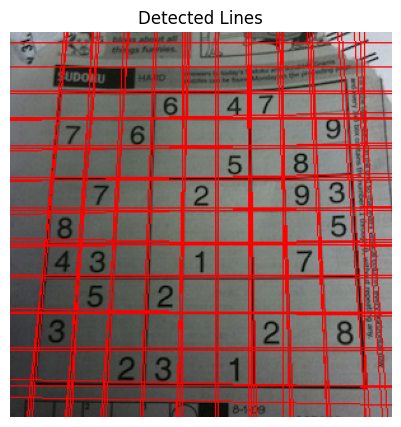

In [137]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('Images/lines.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection (e.g., Canny edge detection)
edges = cv2.Canny(gray, 0, 90, apertureSize=3)

# Hough transform to detect lines
lines = cv2.HoughLines(edges, rho=0.68, theta=np.pi/180, threshold=100)

# Draw detected lines on the original image
for rho, theta in lines[:, 0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 1)

# Display the original image with detected lines
plt.figure(figsize=(8, 5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.axis('off')
plt.show()


# Task 3 - Another implementation without using HoughLines but takes runtime about 1.3 mins, please bear with the runtime for output.

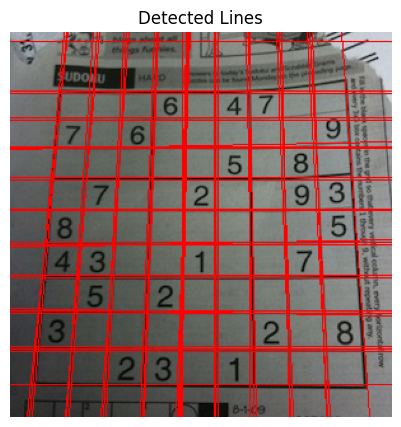

In [138]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

def edge_detection(image):
    # Perform edge detection (e.g., using Canny edge detector)
    edges = cv2.Canny(image, 0, 90)
    return edges

def hough_transform(edges, rho_resolution=0.7, theta_resolution=np.pi/180, threshold=100):
    # Define the parameter space (rho and theta)
    height, width = edges.shape
    max_rho = int(np.ceil(np.sqrt(height**2 + width**2)))  # Max possible rho value
    rho_values = np.arange(-max_rho, max_rho + 1, rho_resolution)
    theta_values = np.arange(0, np.pi, theta_resolution)
    
    # Create an accumulator array to hold the votes for each possible line
    accumulator = np.zeros((len(rho_values), len(theta_values)), dtype=np.uint64)
    
    # Loop through each edge pixel
    edge_points = np.argwhere(edges != 0)
    for y, x in edge_points:
        # Loop through possible values of theta
        for theta_index, theta in enumerate(theta_values):
            # Compute the corresponding rho value
            rho = x * np.cos(theta) + y * np.sin(theta)
            rho_index = np.argmin(np.abs(rho_values - rho))
            # Increment the accumulator array
            accumulator[rho_index, theta_index] += 1
    
    # Threshold the accumulator array to find the most prominent lines
    lines_indices = np.argwhere(accumulator >= threshold)
    lines = [(rho_values[rho_index], theta_values[theta_index]) for rho_index, theta_index in lines_indices]
    
    return accumulator, lines

# Impose the detected lines on the original image
def draw_lines(image, lines):
    # Draw detected lines on the original image
    for rho, theta in lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 1)
    return image

# Read the image
image = cv2.imread('Images/lines.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform edge detection
edges = edge_detection(gray)

# Perform Hough transform
accumulator, lines = hough_transform(edges, rho_resolution=0.7, theta_resolution=np.pi/180, threshold=110)

# Draw detected lines on the original image
image_with_lines = draw_lines(image.copy(), lines)

# Display the original image with detected lines
plt.figure(figsize=(8, 5))
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.axis('off')
plt.show()

